In [2]:
import pandas as pd

# Load the three files
student_info_df = pd.read_csv('studentInfo.csv')
courses_df = pd.read_csv('studentAssessment.csv')
assessments_df = pd.read_csv('assessments.csv')

# Display the first few rows of each dataframe to understand their structure
student_info_df.head(), courses_df.head(), assessments_df.head()


(  code_module code_presentation  id_student gender                region  \
 0         AAA             2013J       11391      M   East Anglian Region   
 1         AAA             2013J       28400      F              Scotland   
 2         AAA             2013J       30268      F  North Western Region   
 3         AAA             2013J       31604      F     South East Region   
 4         AAA             2013J       32885      F  West Midlands Region   
 
        highest_education imd_band age_band  num_of_prev_attempts  \
 0       HE Qualification  90-100%     55<=                     0   
 1       HE Qualification   20-30%    35-55                     0   
 2  A Level or Equivalent   30-40%    35-55                     0   
 3  A Level or Equivalent   50-60%    35-55                     0   
 4     Lower Than A Level   50-60%     0-35                     0   
 
    studied_credits disability final_result  
 0              240          N         Pass  
 1               60         

In [3]:
# Merge student_info with courses on code_module and code_presentation
student_courses_df = pd.merge(student_info_df, courses_df, on=['code_module', 'code_presentation'], how='inner')

# Now merge the result with assessments on code_module and code_presentation
final_merged_df = pd.merge(student_courses_df, assessments_df, on=['code_module', 'code_presentation'], how='inner')

#import ace_tools as tools; tools.display_dataframe_to_user(name="Merged Student Info, Courses, and Assessments Data", dataframe=final_merged_df)
print(final_merged_df)

       code_module code_presentation  id_student gender               region  \
0              AAA             2013J       11391      M  East Anglian Region   
1              AAA             2013J       11391      M  East Anglian Region   
2              AAA             2013J       11391      M  East Anglian Region   
3              AAA             2013J       11391      M  East Anglian Region   
4              AAA             2013J       11391      M  East Anglian Region   
...            ...               ...         ...    ...                  ...   
323920         GGG             2014J     2684003      F     Yorkshire Region   
323921         GGG             2014J     2684003      F     Yorkshire Region   
323922         GGG             2014J     2684003      F     Yorkshire Region   
323923         GGG             2014J     2684003      F     Yorkshire Region   
323924         GGG             2014J     2684003      F     Yorkshire Region   

       highest_education imd_band age_b

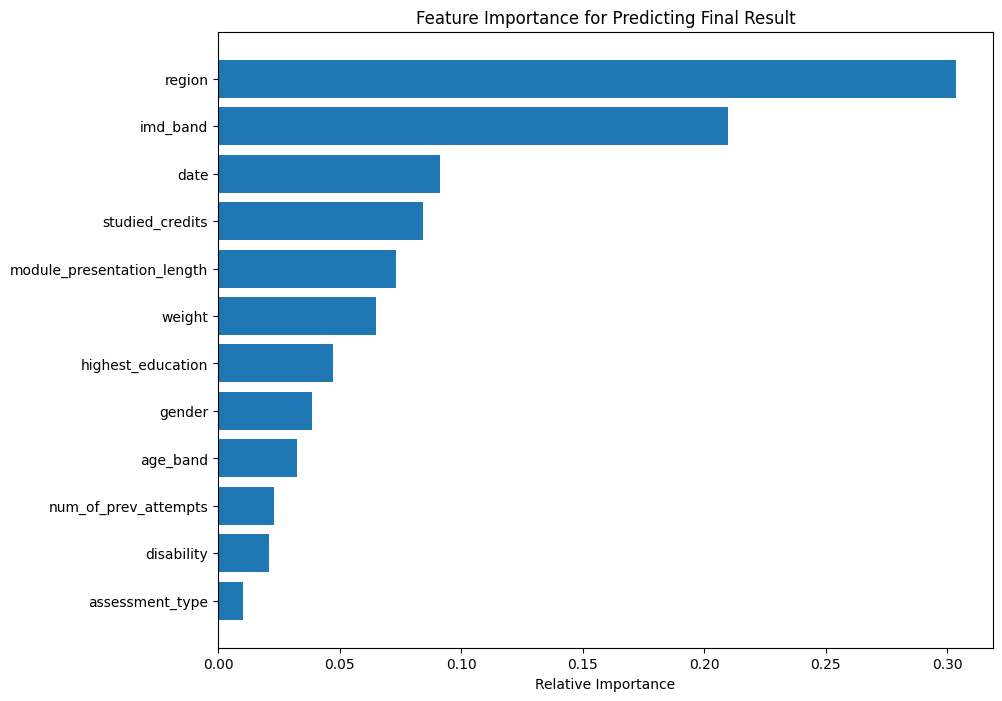

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
data=final_merged_df
# Prepare the data for modeling
# Drop irrelevant columns for predicting 'final_result'
features = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode target variable 'final_result'
target = LabelEncoder().fit_transform(data['final_result'])

# Train a RandomForestClassifier to assess feature importance
model = RandomForestClassifier(random_state=42)
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_

# Create a bar plot of feature importances
feature_names = features.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance for Predicting Final Result')
plt.xlabel('Relative Importance')
plt.show()


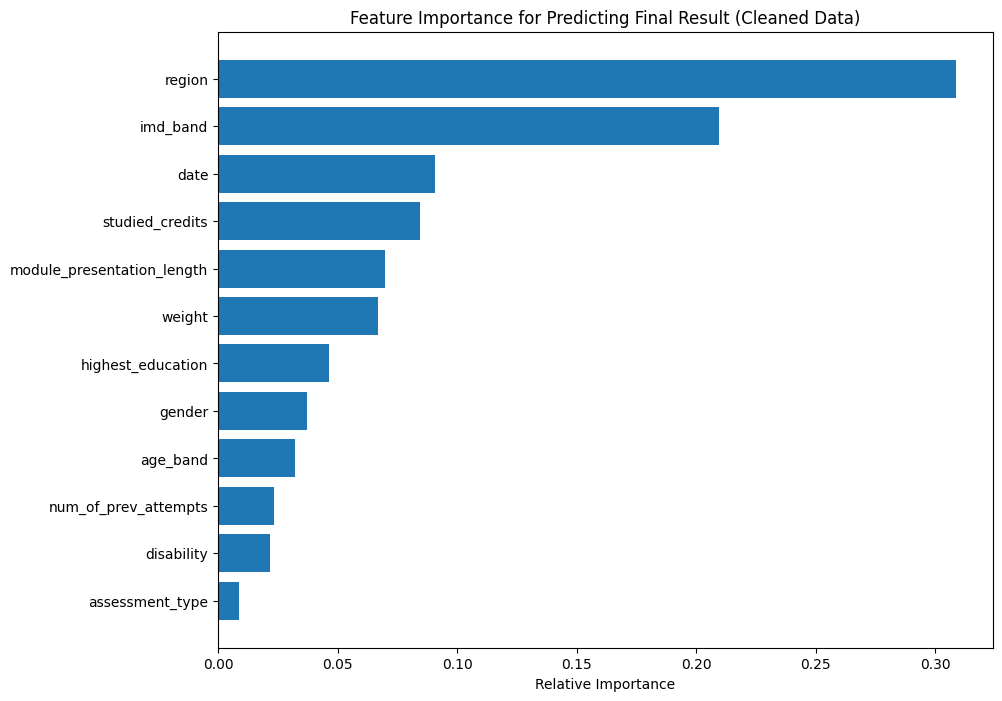

In [5]:
# Remove rows with missing values
cleaned_data = data.dropna()

# Prepare the data for modeling again
features_cleaned = cleaned_data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
for column in features_cleaned.select_dtypes(include=['object']).columns:
    features_cleaned[column] = label_encoders[column].transform(features_cleaned[column])

# Encode target variable 'final_result'
target_cleaned = LabelEncoder().fit_transform(cleaned_data['final_result'])

# Train a RandomForestClassifier on the cleaned data
model_cleaned = RandomForestClassifier(random_state=42)
model_cleaned.fit(features_cleaned, target_cleaned)

# Get feature importances
importances_cleaned = model_cleaned.feature_importances_

# Create a bar plot of feature importances
feature_names_cleaned = features_cleaned.columns
sorted_indices_cleaned = importances_cleaned.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices_cleaned)), importances_cleaned[sorted_indices_cleaned], align='center')
plt.yticks(range(len(sorted_indices_cleaned)), [feature_names_cleaned[i] for i in sorted_indices_cleaned])
plt.title('Feature Importance for Predicting Final Result (Cleaned Data)')
plt.xlabel('Relative Importance')
plt.show()


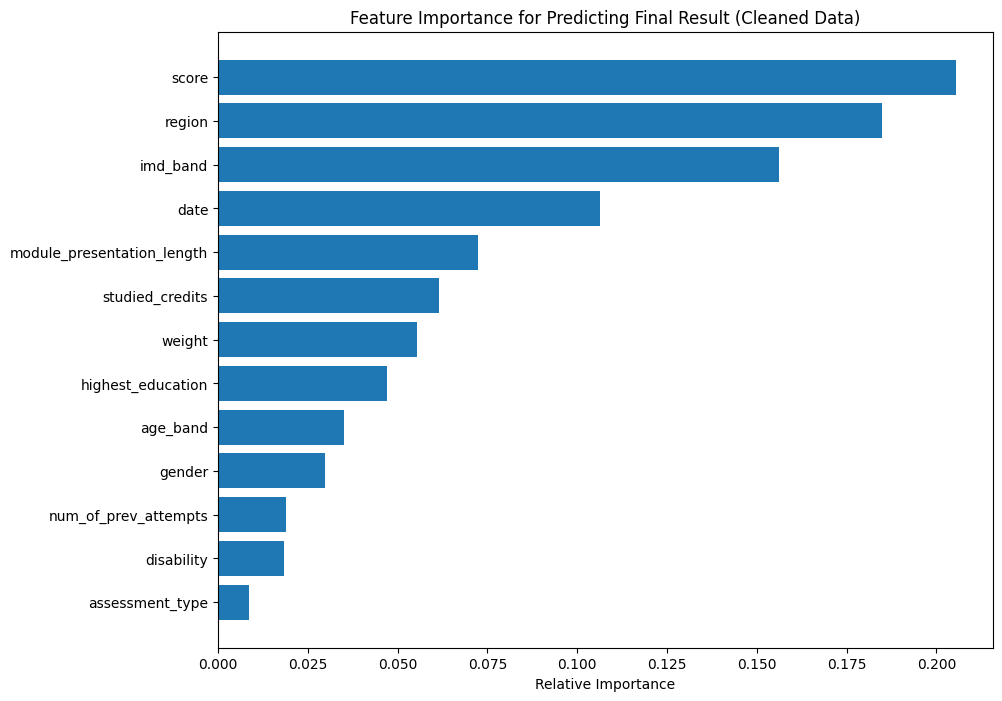

In [7]:
# Re-initialize the necessary parts due to the session reset

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'final_merged_data.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values
cleaned_data = data.dropna()

# Prepare the data for modeling again
features_cleaned = cleaned_data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features_cleaned[column] = label_encoders[column].fit_transform(features_cleaned[column])

# Encode target variable 'final_result'
target_cleaned = LabelEncoder().fit_transform(cleaned_data['final_result'])

# Train a RandomForestClassifier on the cleaned data
model_cleaned = RandomForestClassifier(random_state=42)
model_cleaned.fit(features_cleaned, target_cleaned)

# Get feature importances
importances_cleaned = model_cleaned.feature_importances_

# Create a bar plot of feature importances
feature_names_cleaned = features_cleaned.columns
sorted_indices_cleaned = importances_cleaned.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices_cleaned)), importances_cleaned[sorted_indices_cleaned], align='center')
plt.yticks(range(len(sorted_indices_cleaned)), [feature_names_cleaned[i] for i in sorted_indices_cleaned])
plt.title('Feature Importance for Predicting Final Result (Cleaned Data)')
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
# Perform a correlation analysis on the cleaned dataset
# We will only consider the numerical features for the correlation matrix

correlation_matrix = features_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features', pad=40)
plt.show()


In [ ]:
# Re-initialize the necessary parts due to the session reset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
file_path = '/mnt/data/final_merged_data.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values
cleaned_data = data.dropna()

# Prepare the data for analysis again
features_cleaned = cleaned_data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features_cleaned[column] = label_encoders[column].fit_transform(features_cleaned[column])

# Perform a correlation analysis on the cleaned dataset
correlation_matrix = features_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features', pad=40)
plt.show()


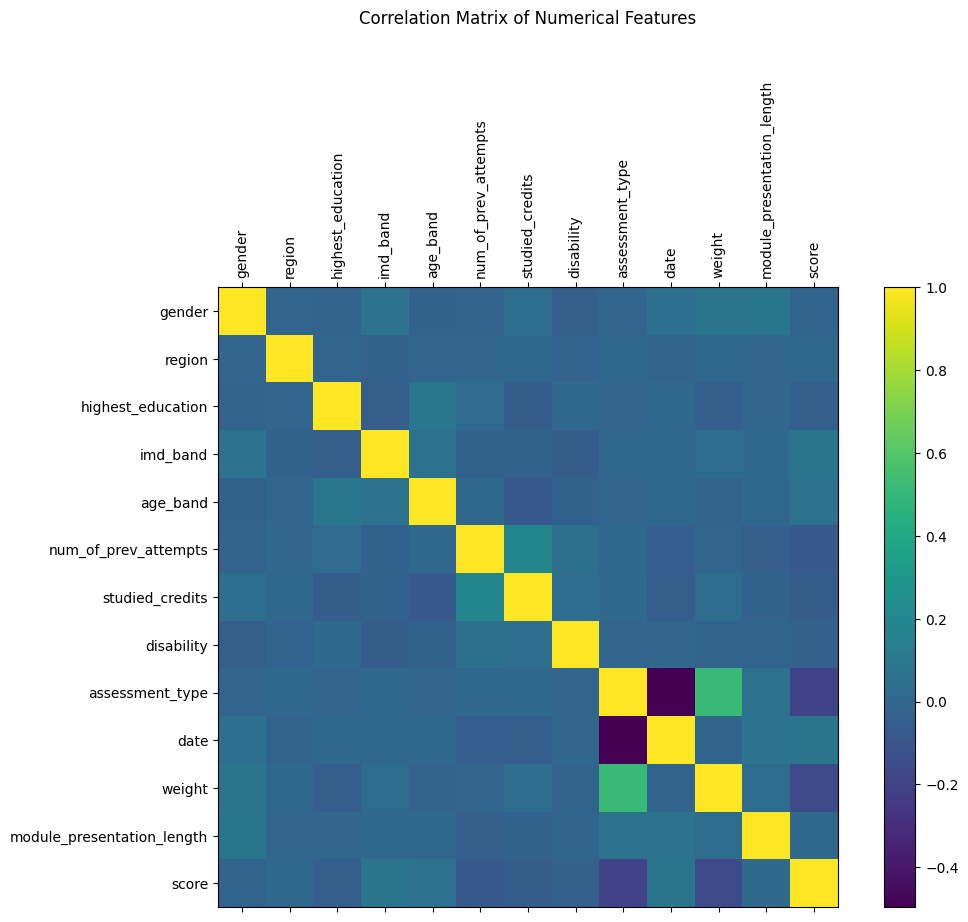

In [8]:
# Re-initialize the necessary parts due to the session reset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
file_path = 'final_merged_data.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values
cleaned_data = data.dropna()

# Prepare the data for analysis again
features_cleaned = cleaned_data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features_cleaned.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features_cleaned[column] = label_encoders[column].fit_transform(features_cleaned[column])

# Perform a correlation analysis on the cleaned dataset
correlation_matrix = features_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features', pad=40)
plt.show()


In [11]:
import pandas as pd

# Load the three files
df = pd.read_csv('fullclean_final1.csv')


# Display the first few rows of each dataframe to understand their structure
df.head()

,gender,highest_education,final_result,score,weight,activity_type
0,1,1,0,78.0,12.5,1.0
1,1,1,0,78.0,12.5,1.0
2,1,1,0,78.0,12.5,1.0
3,1,1,0,78.0,12.5,1.0
4,1,1,0,78.0,12.5,1.0


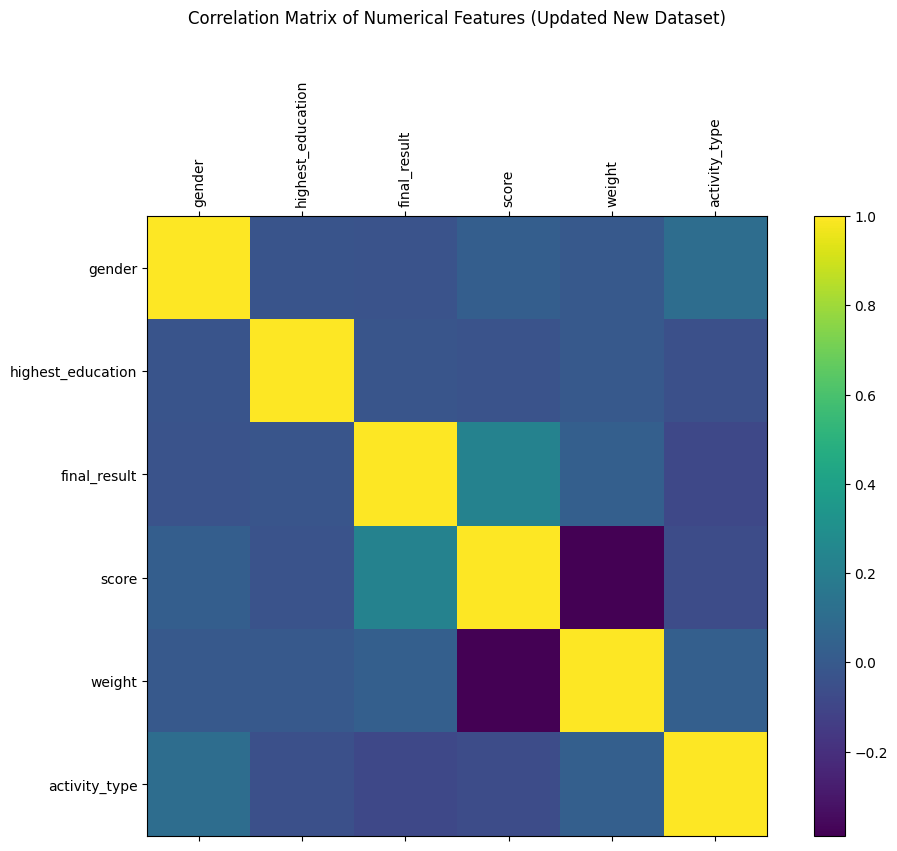

In [17]:
# Load the newly uploaded dataset (if different)
new_file_path_v2 = 'fullclean_final1.csv'
new_data_v2 = pd.read_csv(new_file_path_v2)

# Perform a correlation analysis on the new dataset
correlation_matrix_new_v2 = new_data_v2.corr()

# Plot the correlation matrix for the new dataset
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix_new_v2, fignum=1)
plt.xticks(range(len(correlation_matrix_new_v2.columns)), correlation_matrix_new_v2.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_new_v2.columns)), correlation_matrix_new_v2.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features (Updated New Dataset)', pad=40)
plt.show()


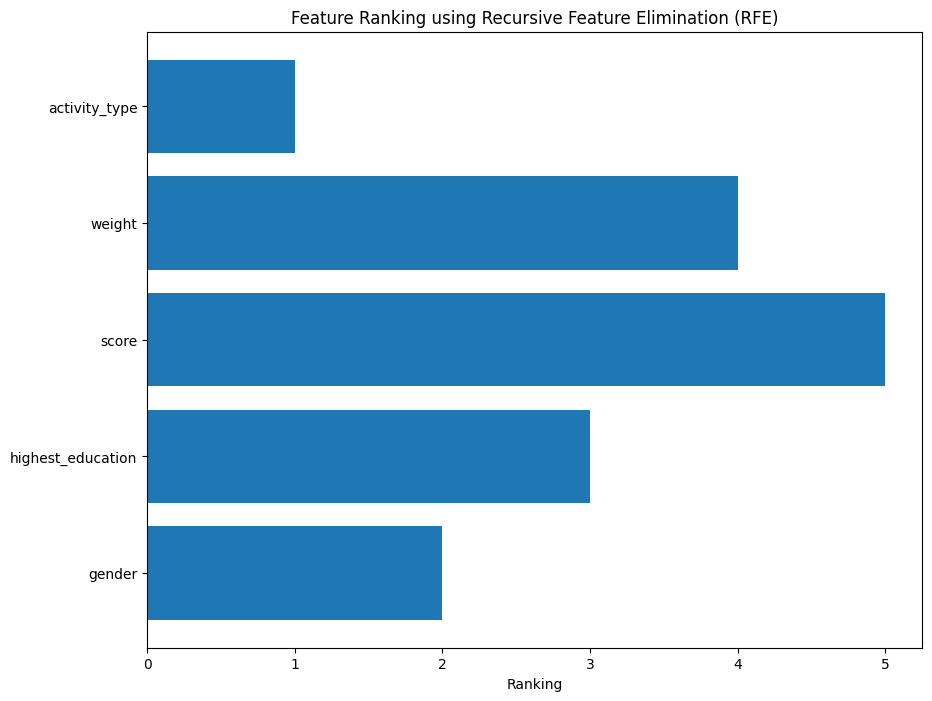

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Prepare features and target for RFE
features_rfe = new_data_v2.drop(columns=['final_result'])
target_rfe = new_data_v2['final_result']

# Initialize the model for RFE
model_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model_rfe, n_features_to_select=1)

# Fit the RFE model
rfe.fit(features_rfe, target_rfe)

# Get the ranking of features
ranking = rfe.ranking_

# Create a bar plot of the feature rankings
plt.figure(figsize=(10, 8))
plt.barh(range(len(ranking)), ranking, align='center')
plt.yticks(range(len(ranking)), features_rfe.columns)
plt.title('Feature Ranking using Recursive Feature Elimination (RFE)')
plt.xlabel('Ranking')
plt.show()


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the newly uploaded dataset again
new_file_path_v3 = 'fullclean_final1.csv'
new_data_v3 = pd.read_csv(new_file_path_v3)

# Reinitialize the models dictionary due to the session reset

# Initialize models again
models_v3 = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Dictionary to store results
results_v3 = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models_v3.items():
    # Train the model
    model.fit(X_train_v3, y_train_v3)
    # Predict on the test set
    y_pred_v3 = model.predict(X_test_v3)
    # Evaluate the model
    accuracy = accuracy_score(y_test_v3, y_pred_v3)
    precision = precision_score(y_test_v3, y_pred_v3)
    recall = recall_score(y_test_v3, y_pred_v3)
    f1 = f1_score(y_test_v3, y_pred_v3)
    
    # Store the results
    results_v3['Model'].append(model_name)
    results_v3['Accuracy'].append(accuracy)
    results_v3['Precision'].append(precision)
    results_v3['Recall'].append(recall)
    results_v3['F1 Score'].append(f1)

# Convert the results to a DataFrame and display
results_df_v3 = pd.DataFrame(results_v3)



print(results_df_v3)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.760326   0.763054  0.963900  0.851798
1        Random Forest  0.760567   0.762137  0.966599  0.852277
2  Logistic Regression  0.727017   0.733890  0.969523  0.835409
3                  SVM  0.727821   0.727404  0.990160  0.838684
4    Gradient Boosting  0.750321   0.757569  0.956759  0.845592
5       Neural Network  0.743933   0.753634  0.953273  0.841779


In [22]:
# Re-load the dataset first
new_file_path_v4 = 'fullclean_final1.csv'
new_data_v4 = pd.read_csv(new_file_path_v4)

# Prepare features and target again
features_v4 = new_data_v4.drop(columns=['final_result'])
target_v4 = new_data_v4['final_result']

# Split the data into training and testing sets
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = train_test_split(features_v4, target_v4, test_size=0.3, random_state=42)

# Now re-train and evaluate the Neural Network model
nn_model_v4 = MLPClassifier(random_state=42, max_iter=1000)

# Train the Neural Network model
nn_model_v4.fit(X_train_v4, y_train_v4)

# Predict on the test set
y_pred_nn_v4 = nn_model_v4.predict(X_test_v4)

# Evaluate the Neural Network model
accuracy_nn_v4 = accuracy_score(y_test_v4, y_pred_nn_v4)
precision_nn_v4 = precision_score(y_test_v4, y_pred_nn_v4)
recall_nn_v4 = recall_score(y_test_v4, y_pred_nn_v4)
f1_nn_v4 = f1_score(y_test_v4, y_pred_nn_v4)

# Store the results
nn_results_v4 = {
    'Model': ['Neural Network'],
    'Accuracy': [accuracy_nn_v4],
    'Precision': [precision_nn_v4],
    'Recall': [recall_nn_v4],
    'F1 Score': [f1_nn_v4]
}

# Convert the results to a DataFrame and display
nn_results_df_v4 = pd.DataFrame(nn_results_v4)

print(nn_results_df_v4)

            Model  Accuracy  Precision    Recall  F1 Score
0  Neural Network  0.743933   0.753634  0.953273  0.841779


In [24]:
# Re-train and evaluate the Gradient Boosting model on the dataset

# Re-load the dataset first
new_file_path_v6 = 'fullclean_final1.csv'
new_data_v6 = pd.read_csv(new_file_path_v6)

# Prepare features and target again
features_v6 = new_data_v6.drop(columns=['final_result'])
target_v6 = new_data_v6['final_result']

# Split the data into training and testing sets
X_train_v6, X_test_v6, y_train_v6, y_test_v6 = train_test_split(features_v6, target_v6, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting model
gb_model_v6 = GradientBoostingClassifier(random_state=42)
gb_model_v6.fit(X_train_v6, y_train_v6)

# Predict on the test set
y_pred_gb_v6 = gb_model_v6.predict(X_test_v6)

# Evaluate the Gradient Boosting model
accuracy_gb_v6 = accuracy_score(y_test_v6, y_pred_gb_v6)
precision_gb_v6 = precision_score(y_test_v6, y_pred_gb_v6)
recall_gb_v6 = recall_score(y_test_v6, y_pred_gb_v6)
f1_gb_v6 = f1_score(y_test_v6, y_pred_gb_v6)

# Store the results
gb_results_v6 = {
    'Model': ['Gradient Boosting'],
    'Accuracy': [accuracy_gb_v6],
    'Precision': [precision_gb_v6],
    'Recall': [recall_gb_v6],
    'F1 Score': [f1_gb_v6]
}

# Convert the result to a DataFrame and display
gb_results_df_v6 = pd.DataFrame(gb_results_v6)

print(gb_results_df_v6)


               Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting  0.750321   0.757569  0.956759  0.845592


In [26]:
# Load the dataset again
from sklearn.metrics import roc_auc_score

new_file_path_v5 = 'fullclean_final1.csv'
new_data_v5 = pd.read_csv(new_file_path_v5)

# Prepare features and target
features_v5 = new_data_v5.drop(columns=['final_result'])
target_v5 = new_data_v5['final_result']

# Split the data into training and testing sets
X_train_v5, X_test_v5, y_train_v5, y_test_v5 = train_test_split(features_v5, target_v5, test_size=0.3, random_state=42)

# Re-train all the models for ROC AUC comparison
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True)

# Train the models
lr_model.fit(X_train_v5, y_train_v5)
dt_model.fit(X_train_v5, y_train_v5)
rf_model.fit(X_train_v5, y_train_v5)
gb_model.fit(X_train_v5, y_train_v5)
svm_model.fit(X_train_v5, y_train_v5)

# Predict probabilities
lr_prob_v5 = lr_model.predict_proba(X_test_v5)[:, 1]
dt_prob_v5 = dt_model.predict_proba(X_test_v5)[:, 1]
rf_prob_v5 = rf_model.predict_proba(X_test_v5)[:, 1]
gb_prob_v5 = gb_model.predict_proba(X_test_v5)[:, 1]
svm_prob_v5 = svm_model.predict_proba(X_test_v5)[:, 1]

# Calculate ROC AUC scores
lr_roc_auc_v5 = roc_auc_score(y_test_v5, lr_prob_v5)
dt_roc_auc_v5 = roc_auc_score(y_test_v5, dt_prob_v5)
rf_roc_auc_v5 = roc_auc_score(y_test_v5, rf_prob_v5)
gb_roc_auc_v5 = roc_auc_score(y_test_v5, gb_prob_v5)
svm_roc_auc_v5 = roc_auc_score(y_test_v5, svm_prob_v5)

# Create the comparison table
roc_auc_comparison_data_v5 = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'ROC AUC Score': [lr_roc_auc_v5, dt_roc_auc_v5, rf_roc_auc_v5, gb_roc_auc_v5, svm_roc_auc_v5]
}

# Convert the data into a DataFrame
roc_auc_comparison_df_v5 = pd.DataFrame(roc_auc_comparison_data_v5)

# Display the table to the user
print(roc_auc_comparison_df_v5)


                    Model  ROC AUC Score
0     Logistic Regression       0.667053
1           Decision Tree       0.734818
2           Random Forest       0.734752
3       Gradient Boosting       0.710470
4  Support Vector Machine       0.628780


In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Load and Prepare the Dataset
df = pd.read_csv('fullclean_final1.csv')

# Drop any unnecessary columns
#df = df.drop(['unnecessary_column1', 'unnecessary_column2'], axis=1)

# Separate features and target variable
X = df.drop('final_result', axis=1)  # Features
y = df['final_result']  # Target (Pass/Fail)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data Balancing using SMOTE (optional)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the balanced dataset
rf_model.fit(X_train_balanced, y_train_balanced)

# Step 5: Make Predictions on the Test Set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Step 7: Model Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
print(f'Optimized Accuracy: {accuracy_score(y_test, y_pred_best)}')

# Step 8: Cross-Validation (Optional)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print Cross-Validation Results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Step 9: Feature Importance (Optional)
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print('Feature Importances:')
print(feature_importances_df)


Accuracy: 0.6911162005785921
Precision: 0.8181903953203132
Recall: 0.7305812973883741
F1 Score: 0.7719079620810895
Confusion Matrix:
[[2795 1927]
 [3198 8672]]
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  19.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  19.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=2, min_sample

In [28]:
# Separate the features and target
X = df.drop('final_result', axis=1)  # Features
y = df['final_result']  # Target (Pass/Fail)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we will handle categorical variables and train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For simplicity, let's standardize the numerical features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
accuracy, precision, recall, f1


(0.7594623915139826,
 np.float64(0.7633179600294098),
 np.float64(0.962089300758214),
 np.float64(0.8512541463232828))

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest model on the balanced dataset
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Step 4: Make predictions on the test set
y_pred_balanced = rf_model_balanced.predict(X_test)

# Step 5: Evaluate the model performance
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced, average='binary')
recall_balanced = recall_score(y_test, y_pred_balanced, average='binary')
f1_balanced = f1_score(y_test, y_pred_balanced, average='binary')

# Step 6: Print the confusion matrix
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

print(f"Accuracy: {accuracy_balanced}")
print(f"Precision: {precision_balanced}")
print(f"Recall: {recall_balanced}")
print(f"F1 Score: {f1_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)


Accuracy: 0.6911162005785921
Precision: 0.8181903953203132
Recall: 0.7305812973883741
F1 Score: 0.7719079620810895
Confusion Matrix:
[[2795 1927]
 [3198 8672]]


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# SMOTE (Oversampling)
# -------------------------
# Step 2: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest with SMOTE balanced data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_balanced, y_train_balanced)

# Step 4: Make predictions and evaluate
y_pred_smote = rf_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# -------------------------
# Class Weight Balancing
# -------------------------
# Step 5: Train Random Forest with class_weight='balanced'
rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_weighted.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred_weighted = rf_weighted.predict(X_test)

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# -------------------------
# Results Comparison
# -------------------------
print("=== SMOTE Results ===")
print(f"Accuracy: {accuracy_smote}")
print(f"Precision: {precision_smote}")
print(f"Recall: {recall_smote}")
print(f"F1 Score: {f1_smote}")

print("\n=== Class Weight Balancing Results ===")
print(f"Accuracy: {accuracy_weighted}")
print(f"Precision: {precision_weighted}")
print(f"Recall: {recall_weighted}")
print(f"F1 Score: {f1_weighted}")


=== SMOTE Results ===
Accuracy: 0.6911162005785921
Precision: 0.8181903953203132
Recall: 0.7305812973883741
F1 Score: 0.7719079620810895

=== Class Weight Balancing Results ===
Accuracy: 0.6929845708775313
Precision: 0.8172878816257726
Recall: 0.7352148272957034
F1 Score: 0.7740819584885578


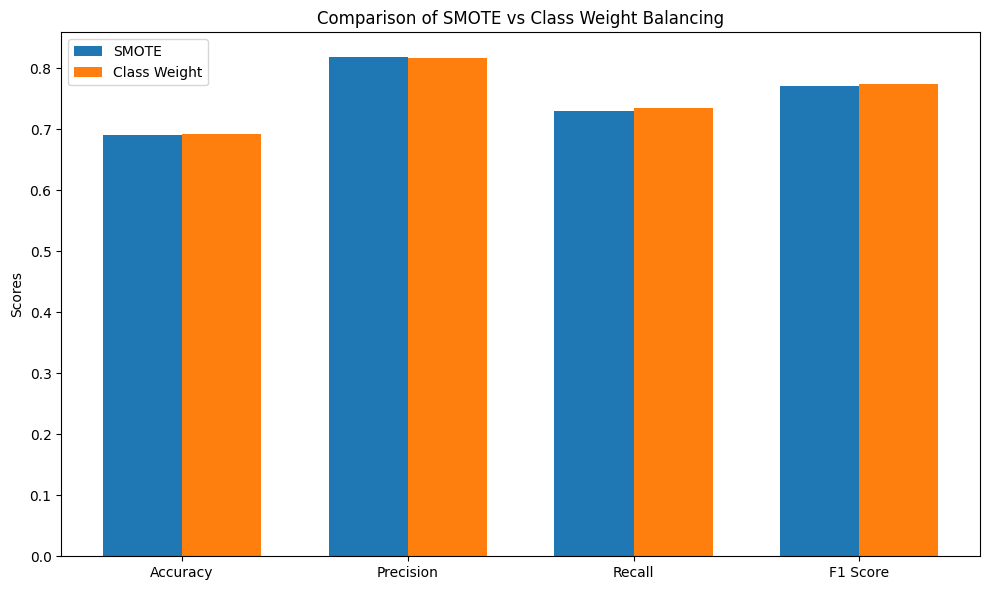

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Results for SMOTE
metrics_smote = [accuracy_smote, precision_smote, recall_smote, f1_smote]
# Results for class weight balancing
metrics_weighted = [accuracy_weighted, precision_weighted, recall_weighted, f1_weighted]

# Metric names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create the plot
x = np.arange(len(metrics_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for SMOTE and class weight balancing
rects1 = ax.bar(x - width/2, metrics_smote, width, label='SMOTE')
rects2 = ax.bar(x + width/2, metrics_weighted, width, label='Class Weight')

# Add labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of SMOTE vs Class Weight Balancing')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [42]:
# Let's train the Random Forest model again (since SMOTE isn't available) and save it as a pickle file

from sklearn.ensemble import RandomForestClassifier
import pickle

# Re-train the Random Forest model with class weight balancing (as SMOTE is not available)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Save the model to a .pkl file
model_path = 'rf_model_balanced.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(rf_model, file)

# Confirm the path to the saved model
model_path


'rf_model_balanced.pkl'

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Load and Prepare the Dataset
df = pd.read_csv('vdataset.csv')
# Separate the features and target variable
X_new_vdataset = df.drop('final_result', axis=1)
y_new_vdataset = df['final_result']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_new_vdataset, y_new_vdataset)

# Check the distribution of the target variable after SMOTE
print(y_balanced.value_counts())

# Split the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a model on the balanced dataset
from sklearn.ensemble import RandomForestClassifier
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model
y_pred_balanced = rf_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precision_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

# Print the performance metrics
print(f'Accuracy: {accuracy_balanced}')
print(f'Precision: {precision_balanced}')
print(f'Recall: {recall_balanced}')
print(f'F1 Score: {f1_balanced}')


final_result
1    74
0    74
Name: count, dtype: int64
Accuracy: 0.6666666666666666
Precision: 0.6
Recall: 0.6923076923076923
F1 Score: 0.6428571428571429


In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
df = pd.read_csv('vdataset.csv')

# Separate the features and target variable
X_new_vdataset = df.drop('final_result', axis=1)
y_new_vdataset = df['final_result']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=100)
X_balanced, y_balanced = smote.fit_resample(X_new_vdataset, y_new_vdataset)

# Check the distribution of the target variable after SMOTE
print(y_balanced.value_counts())

# Split the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a model on the balanced dataset
from sklearn.ensemble import RandomForestClassifier
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model
y_pred_balanced = rf_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precision_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

# Print the performance metrics
print(f'Accuracy: {accuracy_balanced}')
print(f'Precision: {precision_balanced}')
print(f'Recall: {recall_balanced}')
print(f'F1 Score: {f1_balanced}')


final_result
1    74
0    74
Name: count, dtype: int64
Accuracy: 0.6666666666666666
Precision: 0.5882352941176471
Recall: 0.7692307692307693
F1 Score: 0.6666666666666666


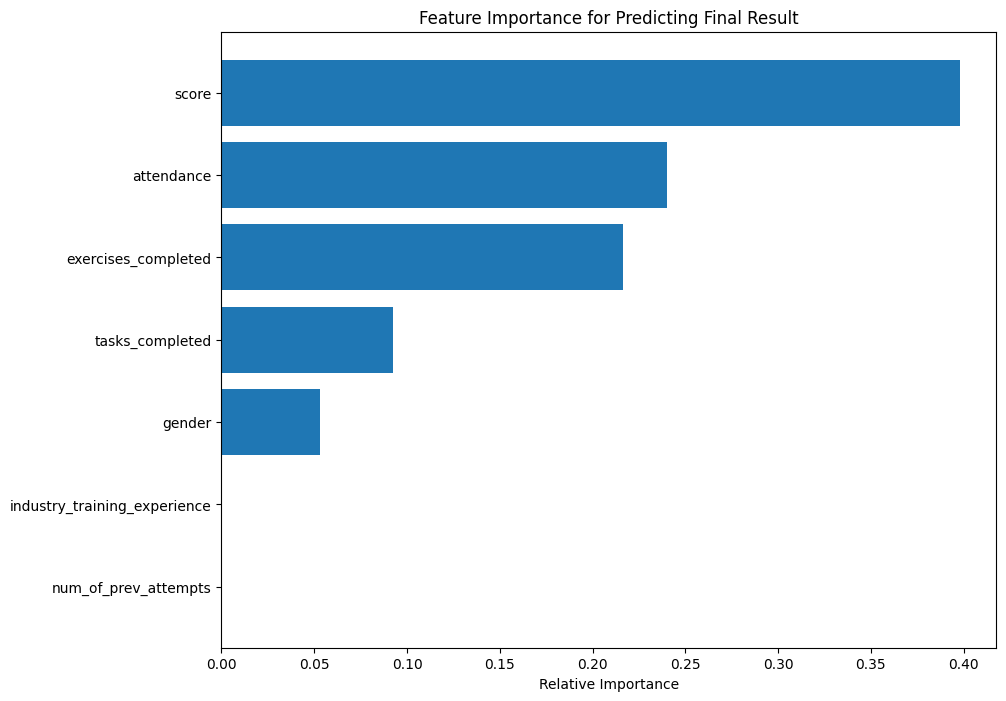

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vdataset.csv')

# Drop irrelevant columns if needed
# Uncomment and modify the next line if you want to drop specific columns
# features = data.drop(columns=['irrelevant_column1', 'irrelevant_column2', 'final_result'])

# For now, let's just drop the 'final_result' column
features = data.drop(columns=['final_result'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode target variable 'final_result'
target = LabelEncoder().fit_transform(data['final_result'])

# Train a RandomForestClassifier to assess feature importance
model = RandomForestClassifier(random_state=42)
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_

# Create a bar plot of feature importances
feature_names = features.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance for Predicting Final Result')
plt.xlabel('Relative Importance')
plt.show()


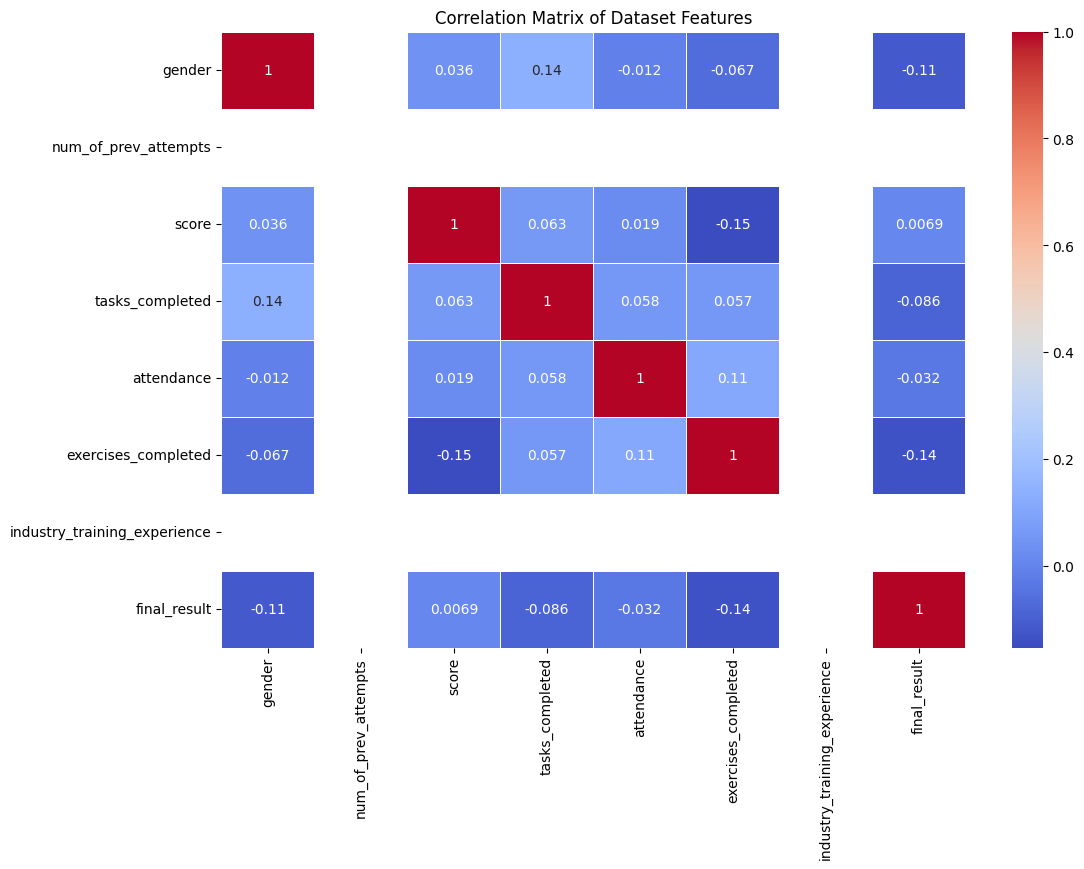

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vdataset.csv')

# Drop irrelevant columns if necessary (modify the column names as needed)
# Uncomment if there are irrelevant columns to drop
# data = data.drop(columns=['irrelevant_column1', 'irrelevant_column2'])

# Encode categorical features to numeric using LabelEncoder for correlation analysis
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Dataset Features')
plt.show()



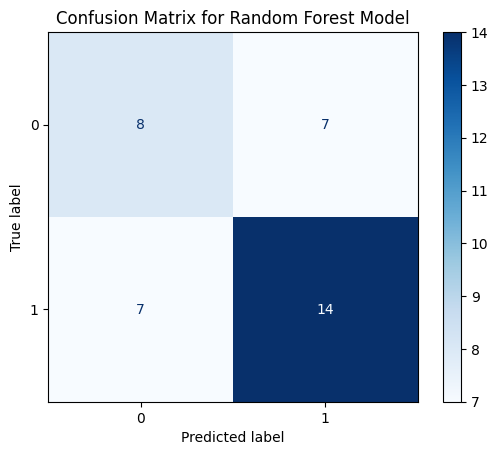

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vdataset.csv')

# Drop irrelevant columns (modify as needed)
features = data.drop(columns=['final_result'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode target variable 'final_result'
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(data['final_result'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Load your dataset
data = pd.read_csv('vdataset.csv')

# Drop irrelevant columns (modify as needed)
features = data.drop(columns=['final_result'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode target variable 'final_result'
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(data['final_result'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Load the pre-trained Random Forest model
model = joblib.load('rf_model_balanced.pkl')

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],            # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the fine-tuned model to a new file
joblib.dump(best_model, 'rf_model_balanced_fine_tuned.pkl')

print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s


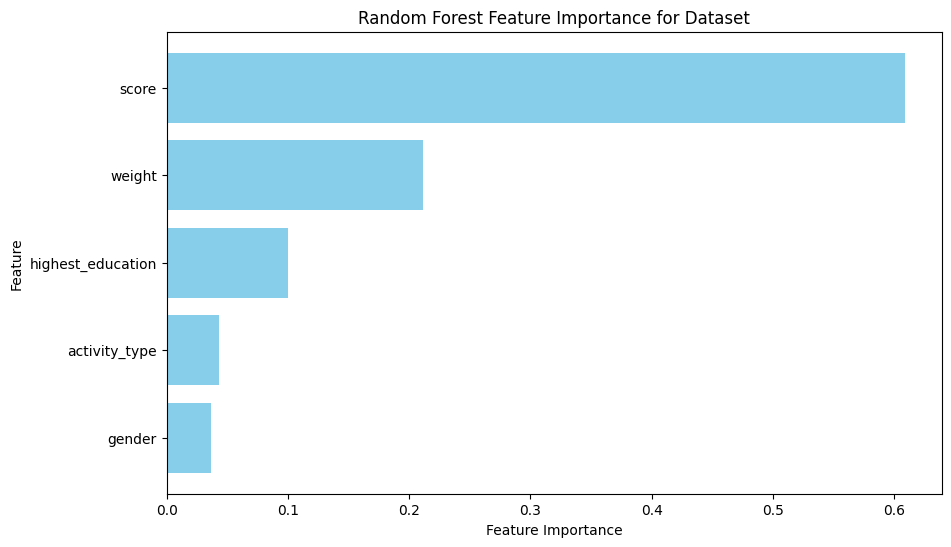

In [2]:
# The dataset contains the following features: gender, highest_education, final_result, score, weight, and activity_type.
# Now let's calculate the feature importance using RandomForestClassifier.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = dataset.drop('final_result', axis=1)
y = dataset['final_result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for Dataset')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()
